In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt

In [ ]:
# 1. Load Dataset
df = pd.read_csv("knn_telecom.csv")

,Age,Gender,PlanType,Tenure,MonthlyUsage,Churn
0,32,Female,Postpaid,28,2455,0
1,27,Female,Basic,11,1310,0
2,41,Female,Basic,46,2890,0
3,22,Female,Postpaid,6,760,1
4,55,Female,Postpaid,52,1780,0


In [5]:
# 2. Encode Categorical Variables
le_gender = LabelEncoder()
le_plan = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["PlanType"] = le_plan.fit_transform(df["PlanType"])

In [6]:
# 3. Separate Features and Target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [7]:
# 4. Feature Scaling (Required for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# 5. Cross Validation Setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

k_values = range(1, 8)
cv_scores = []

In [9]:
# 6. Train and Evaluate for Different K Values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring="accuracy")
    cv_scores.append(scores.mean())

In [10]:
# 7. Display Results
for k, score in zip(k_values, cv_scores):
    print("K =", k, "| Cross Validation Accuracy =", round(score, 3))

K = 1 | Cross Validation Accuracy = 0.967
K = 2 | Cross Validation Accuracy = 0.953
K = 3 | Cross Validation Accuracy = 0.973
K = 4 | Cross Validation Accuracy = 0.96
K = 5 | Cross Validation Accuracy = 0.973
K = 6 | Cross Validation Accuracy = 0.953
K = 7 | Cross Validation Accuracy = 0.953


In [11]:
# 8. Select Best K
best_k = k_values[np.argmax(cv_scores)]
print("\nBest K:", best_k)


Best K: 3


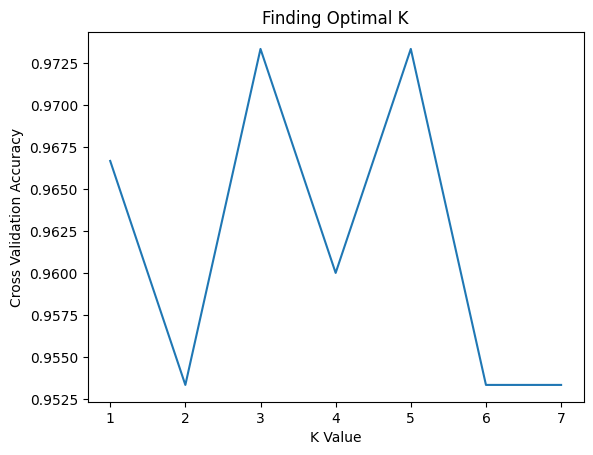

In [12]:
# 9. Plot Results
plt.plot(k_values, cv_scores)
plt.xlabel("K Value")
plt.ylabel("Cross Validation Accuracy")
plt.title("Finding Optimal K")
plt.show()